# Reccomend_V1

### Step 1 - Download all the packages that we will need.

In [1]:
import numpy as np 

import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe


import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

# Matplotlib and associated plotting modules
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries imported.


<a id='item1'></a>

In [2]:
pip install lxml

Note: you may need to restart the kernel to use updated packages.


### Step 2 - Download the basic data on Toronto Neighborhoods!

In [3]:
url='https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'

InfoTable=pd.read_html(url,header=0)

### Step 3 - Prepare the downloaded data so it will be easier to read and handle it

In [4]:
# Saving data into a dataframe...
df_data=InfoTable[0]

#Renaming the "Postal Code" column
df_data=df_data.rename(columns={"Postal Code": "PostalCode"})

# Removing lines with "Not Assigned" Boroughs
df_data=df_data[df_data.Borough != 'Not assigned']

# Substituting the "/" for commas
df_data['Neighborhood'] = df_data['Neighborhood'].str.replace(' /',',')

# Now replacing possible NAs in Neighborhood for value in Borough
df_data['Neighborhood'].fillna(df_data.Borough, inplace=True)

# Also replacing possible "Not Assigned" values on Neighborhood column by values in the Borough column
df_data.Neighborhood.replace("Not assigned",df_data.Borough,inplace=True)

#adjustments over the index
df_data.reset_index(inplace = True)
df_data.drop(columns=['index'], inplace=True)

#Now let's see what we've got..
df_data.head()

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


### Step 4 - We are need to retrieve geolocation information. The geolocation information can be access through the file Geospatial Data. Let's read it into a data frame.

In [5]:
# reading information into pandas dataframe
data_coord=pd.read_csv("http://cocl.us/Geospatial_data")

### Step 5: Let's handle the data and parse it into the previous table

In [6]:
# Let's create a columns called Latitude in df_data...
df_data['Latitude'] = 0
# Dido for Longitude ....
df_data['Longitude'] = 0

#Now lets parse the information on the Coord Dataframe into the main one. 
  #I will create two dictionaries (Latitude and Longitude) to map the information into the dataframe!!! 
    # This will be a faster code than using a loop!

data_coord_lat=data_coord.copy()
data_coord_lat.drop(columns=['Longitude'], inplace=True)
data_coord_lat=data_coord_lat.rename(columns={"Postal Code": "PostalCode"})
data_coord_lat.set_index('PostalCode', inplace=True)

data_coord_long=data_coord.copy()
data_coord_long.drop(columns=['Latitude'], inplace=True)
data_coord_long=data_coord_long.rename(columns={"Postal Code": "PostalCode"})
data_coord_long.set_index('PostalCode', inplace=True)

# Creating dictionaries from the Latidude and Longitude dataframes...
tempdictLat=data_coord_lat.to_dict()
tempdictLong=data_coord_long.to_dict()


# Mapping information into the main dataframe
df_data['Latitude'] = df_data.PostalCode.map(tempdictLat['Latitude'])
df_data['Longitude'] = df_data.PostalCode.map(tempdictLong['Longitude'])

# How does it look like now?
df_data

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village",43.667856,-79.532242
6,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
7,M3B,North York,Don Mills,43.745906,-79.352188
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937


### Step 6 - Start by creating a map of Toronto and ploting the neighborhoods. 

In [7]:
# Using geopy library to get the latitude and longitude values for Toronto, Ontario.

address = 'Toronto, ON'

geolocator = Nominatim(user_agent="ca_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

# With that info let's create a map with the neighborhoods

map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df_data['Latitude'], df_data['Longitude'], df_data['Borough'], df_data['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    




The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [8]:
# Let's see the map...
map_toronto

### Step 7 - We need some more data handling.

####     In order to explore each neighborhood in Toronto, it's necessary to create another dataframe where the neighborhoods in the same row - which are separated by commas - will be alocated into a single row.

In [9]:
# Use split ...
df_data=df_data.assign(Neighborhood=df_data['Neighborhood'].str.split(',')).explode('Neighborhood')

#reseting index and displaing the dataframe
df_data.reset_index(inplace = True)
df_data.drop(columns=['index'], inplace=True)
df_data.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,Regent Park,43.654260,-79.360636
3,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636
4,M6A,North York,Lawrence Manor,43.718518,-79.464763


### Step 8 - Next, we need to retrieve venue data from Foursquare and try to figure something about these neighborhoods. Used free Foursquare account to access the API.

#### Define Foursquare Credentials and Version

In [10]:
CLIENT_ID = 'QDR3CMJJBKPTGPWGQS0XFKPMD24IKPTZR1WFYBB34BXBOUIN' 
CLIENT_SECRET = 'JEDO4VIV25TPRDYP0XBRCVOMH5T1M03CMOYKD2TRG0OQ1ISQ' 
VERSION = '20180605' 

#### I will start exploring the first neigborhood so I can get acquited with the general data retrived. 

In [11]:
# getting first neighborhood name.
df_data.loc[0, 'Neighborhood']

# Let's retrieve geo info about it...
address =  df_data.loc[0, 'Neighborhood']+', ON'
geolocator = Nominatim(user_agent="ca_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
out='The geograpical coordinate of '+ df_data.loc[0, 'Neighborhood']+', '+'Downtown Toronto, ON'
#print(out + ' {}, {}.'.format(latitude, longitude))



# Let's get the top 50 venues in the neighborhood with 500 meters

LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 1000 # define radius

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)

# Requesting from Foursquare into a jason file...
results = requests.get(url).json()



#### --> We need to work with a function to retrieve all the information is in the *items* key.

In [12]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

#### --> Now let's use it to structure the info in the jason file dataframe.

In [13]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Allwyn's Bakery,Caribbean Restaurant,43.759840,-79.324719
1,LCBO,Liquor Store,43.757774,-79.314257
2,Tim Hortons,Café,43.760668,-79.326368
3,Dollarama,Discount Store,43.758135,-79.310672
4,A&W,Fast Food Restaurant,43.760643,-79.326865
5,Tim Hortons,Coffee Shop,43.758295,-79.312310
6,China Cottage,Hakka Restaurant,43.759097,-79.310419
7,Staples,Paper / Office Supplies Store,43.758379,-79.310695
8,Tim Hortons,Coffee Shop,43.752814,-79.314067
9,Subway,Sandwich Place,43.758073,-79.312235


### Step 9 - Creating a simplified profile

#### Let's create a simplified profile that expresses a family's preferences. The profile will consist of venues considered relevant and a rating for each venue that will range from 0.0 - 10.0. Let's model a family that loves outdoor activities, so living close to a park would be extremely relevant. For them, exercising indoors is also important, so Gyms should be a must be. They would also love to dinner on the weekends and having grocery stores as much as coffee shops nearby is relevant. Additionally, this family likes to leave their car in the garage for the weekend, therefore all those venues should be in a 1 km range from their home! For the sake of simplicity at the moment the 1 km will be only considered as a parameter at the query to retrieve the venue data later.
####   Furthermore, it is very important that the neighborhood will have at least one of the venues mentioned above. For example, having 3 grocery shops and no Gyms should exclude the neighborhood from our evaluation. This is something that we shall model in a upcoming step. 

In [14]:
userInput = [
            {'Venue Category':'Restaurants', 'rating':6.5},
            {'Venue Category':'Coffee Place', 'rating':5.5},
            {'Venue Category':'Park', 'rating':10.0},
            {'Venue Category':"Grocery Store", 'rating':8.0},
            {'Venue Category':'Gym', 'rating':8.0}
         ] 
FamProfile_df = pd.DataFrame(userInput)
FamProfile_df

,Venue Category,rating
0,Restaurants,6.5
1,Coffee Place,5.5
2,Park,10.0
3,Grocery Store,8.0
4,Gym,8.0


<a id='item2'></a>

### Let's explore Neighborhoods in Toronto

#### To start, we need to work on a function so to repeat the same process to all the neighborhoods - also need to consider that some locations don't have geoinfo!

In [15]:
# Let's work with the following function!!!!!!
def getNearbyVenues(names, radius=500):
    inter=0
    venues_list=[]
    for name in names:
        
        
        nm=name
        inter=inter+1
        address =  nm +', ON'
        print (address)
        geolocator = Nominatim(user_agent="ca_explorer")
        location = geolocator.geocode(address)
        print(type(location))
        print(inter)
        #if inter==4:
            #print('shit!!!')
            #continue
        if location is None:
            print('shit!!!!!')
            continue
        latitude = location.latitude
        longitude = location.longitude

        
        
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            latitude, 
            longitude, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            latitude, 
            longitude, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Now we run the function ...

In [17]:
# Let's run it and see how it goes...

dt_venues = getNearbyVenues(names=df_data['Neighborhood'])

Parkwoods, ON
<class 'geopy.location.Location'>
1
Victoria Village, ON
<class 'geopy.location.Location'>
2
Regent Park, ON
<class 'geopy.location.Location'>
3
 Harbourfront, ON
<class 'geopy.location.Location'>
4
Lawrence Manor, ON
<class 'geopy.location.Location'>
5
 Lawrence Heights, ON
<class 'geopy.location.Location'>
6
Queen's Park, ON
<class 'geopy.location.Location'>
7
 Ontario Provincial Government, ON
<class 'NoneType'>
8
shit!!!!!
Islington Avenue, ON
<class 'geopy.location.Location'>
9
 Humber Valley Village, ON
<class 'geopy.location.Location'>
10
Malvern, ON
<class 'geopy.location.Location'>
11
 Rouge, ON
<class 'geopy.location.Location'>
12
Don Mills, ON
<class 'geopy.location.Location'>
13
Parkview Hill, ON
<class 'geopy.location.Location'>
14
 Woodbine Gardens, ON
<class 'geopy.location.Location'>
15
Garden District, ON
<class 'geopy.location.Location'>
16
 Ryerson, ON
<class 'geopy.location.Location'>
17
Glencairn, ON
<class 'geopy.location.Location'>
18
West Deane Par

#### Let's check the size of the resulting dataframe

In [18]:
print(dt_venues.shape)
dt_venues.head()

(5013, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.7588,-79.320197,Allwyn's Bakery,43.759840,-79.324719,Caribbean Restaurant
1,Parkwoods,43.7588,-79.320197,LCBO,43.757774,-79.314257,Liquor Store
2,Parkwoods,43.7588,-79.320197,Petro-Canada,43.757950,-79.315187,Gas Station
3,Parkwoods,43.7588,-79.320197,Shoppers Drug Mart,43.760857,-79.324961,Pharmacy
4,Parkwoods,43.7588,-79.320197,Pizza Pizza,43.760231,-79.325666,Pizza Place


Let's check how many venues were returned for each neighborhood

In [19]:
dt_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agincourt North,27,27,27,27,27,27
Albion Gardens,4,4,4,4,4,4
Bathurst Quay,24,24,24,24,24,24
Bloordale Gardens,10,10,10,10,10,10
Broadview North (Old East York),9,9,9,9,9,9
Cabbagetown,49,49,49,49,49,49
Chinatown,36,36,36,36,36,36
Clairlea,10,10,10,10,10,10
Cliffcrest,5,5,5,5,5,5


#### Let's find out how many unique categories can be curated from all the returned venues

In [20]:
print('There are {} uniques categories.'.format(len(dt_venues['Venue Category'].unique())))

There are 341 uniques categories.


<a id='item3'></a>

## Step 10 - Let's analyze Each Neighborhood

I will start with some one hot encoding to make things easier.

In [21]:
# one hot encoding
dt_onehot = pd.get_dummies(dt_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe at first position and populating it with data
dt_onehot = dt_onehot[ ['Neighborhood'] + [ col for col in dt_onehot.columns if col != 'Neighborhood' ] ]
dt_onehot['Neighborhood'] = dt_venues['Neighborhood'] 

dt_onehot.head()

,Neighborhood,ATM,Accessories Store,Afghan Restaurant,Airport,Airport Service,American Restaurant,Animal Shelter,Antique Shop,Aquarium,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Dealership,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Big Box Store,Bike Trail,Bistro,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Castle,Cheese Shop,Chinese Breakfast Place,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,College Stadium,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Costume Shop,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dive Bar,Doctor's Office,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Elementary School,English Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hakka Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hong Kong Restaurant,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Intersection,Irani Cafe,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Knitting Store,Korean Restaurant,Lake,Laser Tag,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Leather Goods Store,Lebanese Restaurant,Library,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Luggage Store,Mac & Cheese Joint,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Mountain,Movie Theater,Moving Target,Mughlai Restaurant,Multiplex,Museum,Music Venue,Nail Salon,New American Restaurant,Night Market,Nightclub,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Supply Store,Pakistani Restaurant,Paper / Office Supplies Store,Park,Parsi Restaurant,Pastry Shop,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Piano Bar,Pilates Studio,Pizza Place,Platform,Playground,Plaza,Poke Place,Pool,Pool Hall,Portuguese Restaurant,Poutine Place,Print Shop,Pub,Racetrack,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Resort,Restaurant,River,Road,Rock Climbing Spot,Rock Club,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Sho

##### --> Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [22]:
dt_grouped = dt_onehot.groupby('Neighborhood').mean().reset_index()
dt_grouped.head()

,Neighborhood,ATM,Accessories Store,Afghan Restaurant,Airport,Airport Service,American Restaurant,Animal Shelter,Antique Shop,Aquarium,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Dealership,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Big Box Store,Bike Trail,Bistro,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Castle,Cheese Shop,Chinese Breakfast Place,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,College Stadium,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Costume Shop,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dive Bar,Doctor's Office,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Elementary School,English Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hakka Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hong Kong Restaurant,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Intersection,Irani Cafe,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Knitting Store,Korean Restaurant,Lake,Laser Tag,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Leather Goods Store,Lebanese Restaurant,Library,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Luggage Store,Mac & Cheese Joint,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Mountain,Movie Theater,Moving Target,Mughlai Restaurant,Multiplex,Museum,Music Venue,Nail Salon,New American Restaurant,Night Market,Nightclub,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Supply Store,Pakistani Restaurant,Paper / Office Supplies Store,Park,Parsi Restaurant,Pastry Shop,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Piano Bar,Pilates Studio,Pizza Place,Platform,Playground,Plaza,Poke Place,Pool,Pool Hall,Portuguese Restaurant,Poutine Place,Print Shop,Pub,Racetrack,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Resort,Restaurant,River,Road,Rock Climbing Spot,Rock Club,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Sho

#### ---> Let's check its shape before we move on.

In [23]:
dt_grouped.shape

(182, 341)

### Step 11 - We need to work on some extra data handling. 

#### ---> The data is loaded with all different sorts of restaurant that might impact the analysis. For now, the type of restaurant won't be a relevant feature to the model, therefore, to simply the code I am going through the columns that represent data on restaurants, then will add a new column to represent them as a whole.

#### --> One can also realize that the dataframe contrains data on 'Café' and 'Coffee Shop', I am also gonna deal with those as one single sort of venue!

In [24]:
dt_grouped_b=dt_grouped.copy()
dt_grouped_b.reset_index(inplace = True)
dt_grouped_b.drop(columns=['index'], inplace=True)
# Let's keep the previous information on the "_b" dataframe.

out=[]   
keyout='estaurant'
for col in dt_grouped.columns:
    x=keyout in col
    if x is True:
        out.append(col)
    

# Creating the column 'Restaurants' with the average of every restaurant data

dt_grouped['Restaurants'] = dt_grouped[out].sum(axis=1)

# Now, let's get rid off the columns that contain data on restaurants
dt_grouped.drop(columns= out, inplace=True)

# Now dealing with Coffee Places..
dt_grouped['Coffee Place'] = dt_grouped[['Coffee Shop','Café']].sum(axis=1)
dt_grouped.drop(columns= ['Coffee Shop','Café'], inplace=True)

dt_grouped.head()


,Neighborhood,ATM,Accessories Store,Airport,Airport Service,Animal Shelter,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Athletics & Sports,Auto Dealership,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Store,Big Box Store,Bike Trail,Bistro,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Camera Store,Candy Store,Castle,Cheese Shop,Chinese Breakfast Place,Chiropractor,Chocolate Shop,Church,Clothing Store,Cocktail Bar,College Arts Building,College Auditorium,College Gym,College Rec Center,College Stadium,College Theater,Comedy Club,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Costume Shop,Creperie,Cupcake Shop,Curling Ice,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Discount Store,Distribution Center,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Electronics Store,Elementary School,Event Space,Farm,Farmers Market,Field,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,Gift Shop,Golf Course,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indie Movie Theater,Indie Theater,Intersection,Irani Cafe,Irish Pub,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Knitting Store,Lake,Laser Tag,Laundromat,Laundry Service,Lawyer,Leather Goods Store,Library,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Luggage Store,Mac & Cheese Joint,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Medical Center,Men's Store,Metro Station,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Mountain,Movie Theater,Moving Target,Multiplex,Museum,Music Venue,Nail Salon,Night Market,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Supply Store,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Pet Store,Pharmacy,Piano Bar,Pilates Studio,Pizza Place,Platform,Playground,Plaza,Poke Place,Pool,Pool Hall,Poutine Place,Print Shop,Pub,Racetrack,Record Shop,Recreation Center,Rental Car Location,Resort,River,Road,Rock Climbing Spot,Rock Club,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Shipping Store,Shoe Store,Shopping Mall,Shopping Plaza,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,Social Club,Souvlaki Shop,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stables,Stadium,Steakhouse,Storage Facility,Street Art,Strip Club,Supermarket,Supplement Shop,Taco Place,Tailor Shop,Tattoo Parlor,Tea Room,Tennis Court,Theater,Theme Park,Theme Park Ride / Attraction,Thrift / Vintage Store,Toy / Game Store,Track,Trail,Train Station,Tree,Tunnel,University,Video Game Store,Video Store,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Restaurants,Coffee Place
0,Agincourt North,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.074074,0.074074,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.037037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.037037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.037037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.037037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.037037,0.037

#### Now that we are considering any restaurant as Restaurants, let's move on adding each neighborhood along with the top 5 most common venues to a dataframe

#### --- > Let's put that info a *pandas* dataframe

In [25]:
# Writing a function to order venues in descending order

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

#### --- > Let's create the new dataframe and display the top 10 venues for each neighborhood

In [26]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = dt_grouped['Neighborhood']

for ind in np.arange(dt_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(dt_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt North,Restaurants,Bank,Bakery,Pharmacy,Beer Store,Sporting Goods Shop,Spa,Sandwich Place,Clothing Store,Pizza Place
1,Albion Gardens,Ice Cream Shop,Arts & Crafts Store,Convenience Store,Field,Elementary School,Event Space,Farm,Farmers Market,Fish & Chips Shop,Fish Market
2,Bathurst Quay,Coffee Place,Restaurants,Park,Tunnel,Garden,Sculpture Garden,Grocery Store,Gym,Harbor / Marina,Diner
3,Bloordale Gardens,Convenience Store,Bank,Deli / Bodega,Sandwich Place,Donut Shop,Shipping Store,Coffee Place,Intersection,Home Service,Doctor's Office
4,Broadview North (Old East York),Coffee Place,Theater,Intersection,Grocery Store,Other Great Outdoors,Park,Discount Store,Bus Line,Ice Cream Shop,Art Museum


<a id='item4'></a>

### Step 12 - Let's train a model to cluster the neighborhoods !!!

#### This will create a set of cluster where neighborhoods will be gathered based on common characteristics. Based on that i will be able to evaluate which set of neighborhoods will be a better fit to the modeled family.

In [27]:
# set number of clusters
kclusters = 5

dt_grouped_clustering = dt_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(dt_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([4, 0, 4, 0, 0, 4, 2, 4, 0, 0], dtype=int32)

#### --> Let's create a new dataframe that includes the cluster as well as the top venues for each neighborhood.

In [28]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

dt_data_b=df_data.copy()
dt_data_b

dt_data_b.reset_index(inplace = True)
dt_data_b.drop(columns=['index'], inplace=True)



dt_merged = dt_data_b

dt_merged.head()

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
dt_merged = dt_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')



dt_merged.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M3A,North York,Parkwoods,43.753259,-79.329656,4.0,Restaurants,Coffee Place,Discount Store,Bus Line,Gas Station,Shopping Mall,Liquor Store,Electronics Store,Laundry Service,Bank
1,M4A,North York,Victoria Village,43.725882,-79.315572,2.0,Restaurants,Coffee Place,Fish & Chips Shop,Electronics Store,Elementary School,Event Space,Farm,Farmers Market,Field,Fish Market
2,M5A,Downtown Toronto,Regent Park,43.654260,-79.360636,4.0,Restaurants,Coffee Place,Auto Dealership,Pub,Pharmacy,Pet Store,Performing Arts Venue,Park,Electronics Store,Beer Store
3,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636,4.0,Coffee Place,Restaurants,Hotel,Park,Pizza Place,Music Venue,Plaza,Sandwich Place,Fried Chicken Joint,Sporting Goods Shop
4,M6A,North York,Lawrence Manor,43.718518,-79.464763,0.0,Doctor's Office,Bank,Electronics Store,Park,Kids Store,Elementary School,Event Space,Farm,Farmers Market,Field


In [29]:
#we need to drop the row which have no values...also change the type from float to integer
dt_merged.dropna(inplace=True)
dt_merged.reset_index(inplace = True)
dt_merged.drop(columns=['index'], inplace=True)
dt_merged['Cluster Labels'] = dt_merged['Cluster Labels'].astype(int) #changing type from float to integer
dt_merged.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M3A,North York,Parkwoods,43.753259,-79.329656,4,Restaurants,Coffee Place,Discount Store,Bus Line,Gas Station,Shopping Mall,Liquor Store,Electronics Store,Laundry Service,Bank
1,M4A,North York,Victoria Village,43.725882,-79.315572,2,Restaurants,Coffee Place,Fish & Chips Shop,Electronics Store,Elementary School,Event Space,Farm,Farmers Market,Field,Fish Market
2,M5A,Downtown Toronto,Regent Park,43.654260,-79.360636,4,Restaurants,Coffee Place,Auto Dealership,Pub,Pharmacy,Pet Store,Performing Arts Venue,Park,Electronics Store,Beer Store
3,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636,4,Coffee Place,Restaurants,Hotel,Park,Pizza Place,Music Venue,Plaza,Sandwich Place,Fried Chicken Joint,Sporting Goods Shop
4,M6A,North York,Lawrence Manor,43.718518,-79.464763,0,Doctor's Office,Bank,Electronics Store,Park,Kids Store,Elementary School,Event Space,Farm,Farmers Market,Field


#### --> Checking the resulting clusters

In [30]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(dt_merged['Latitude'], dt_merged['Longitude'], dt_merged['Neighborhood'], dt_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + 'Cluster' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### Notice that the neighborhood were clustered in a way that geographical features do not matter. That is excellent for our analysis.

<a id='item5'></a>

## 5. Examine Clusters

Now, you can examine each cluster and determine the discriminating venue categories that distinguish each cluster.

#### Cluster 0

In [31]:
dt_merged.loc[dt_merged['Cluster Labels'] == 0, dt_merged.columns[[1] + [2] + list(range(5, dt_merged.shape[1]))]]

,Borough,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,North York,Lawrence Manor,0,Doctor's Office,Bank,Electronics Store,Park,Kids Store,Elementary School,Event Space,Farm,Farmers Market,Field
8,Etobicoke,Humber Valley Village,0,Convenience Store,Skating Rink,Park,Bus Stop,Bakery,Electronics Store,Elementary School,Event Space,Farm,Farmers Market
9,Scarborough,Malvern,0,Pharmacy,Restaurants,Pizza Place,Convenience Store,Skating Rink,Sandwich Place,Park,Grocery Store,Bubble Tea Shop,Cycle Studio
12,East York,Woodbine Gardens,0,Coffee Place,Hobby Shop,Bar,Park,Bakery,Cycle Studio,Donut Shop,Food Court,Food & Drink Shop,Food
14,North York,Glencairn,0,Grocery Store,Restaurants,Tennis Court,Pub,Playground,Pizza Place,Farm,Dog Run,Donut Shop,Electronics Store
18,Etobicoke,Cloverdale,0,Liquor Store,Stadium,Discount Store,Home Service,Pizza Place,Coffee Place,Field,Elementary School,Event Space,Farm
19,Scarborough,Rouge Hill,0,Train Station,Coffee Place,Field,Electronics Store,Elementary School,Event Space,Farm,Farmers Market,Fish & Chips Shop,Dog Run
21,Scarborough,Highland Creek,0,IT Services,Coffee Place,Fish & Chips Shop,Electronics Store,Elementary School,Event Space,Farm,Farmers Market,Field,Fish Market
23,East York,Woodbine Heights,0,Skating Rink,Pharmacy,Bus Stop,Park,Dance Studio,Athletics & Sports,Elementary School,Event Space,Farm,Farmers Market
26,Etobicoke,Bloordale Gardens,0,Convenience Store,Bank,Deli / Bodega,Sandwich Place,Donut Shop,Shipping Store,Coffee Place,Intersection,Home Service,Doctor's Office


#### Cluster 1

In [32]:
dt_merged.loc[dt_merged['Cluster Labels'] == 1, dt_merged.columns[[1] + [2] + list(range(5, dt_merged.shape[1]))]]

,Borough,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
144,Scarborough,Steeles East,1,Playground,Coffee Place,Fish & Chips Shop,Electronics Store,Elementary School,Event Space,Farm,Farmers Market,Field,Fish Market
159,Etobicoke,South Steeles,1,Playground,Coffee Place,Fish & Chips Shop,Electronics Store,Elementary School,Event Space,Farm,Farmers Market,Field,Fish Market
165,Scarborough,Steeles West,1,Playground,Coffee Place,Fish & Chips Shop,Electronics Store,Elementary School,Event Space,Farm,Farmers Market,Field,Fish Market


#### Cluster 2

In [33]:
dt_merged.loc[dt_merged['Cluster Labels'] == 2, dt_merged.columns[[1] + [2] + list(range(5, dt_merged.shape[1]))]]

,Borough,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,North York,Victoria Village,2,Restaurants,Coffee Place,Fish & Chips Shop,Electronics Store,Elementary School,Event Space,Farm,Farmers Market,Field,Fish Market
36,Downtown Toronto,Central Bay Street,2,Restaurants,Coffee Place,Gym / Fitness Center,Cocktail Bar,Bar,Hotel,Social Club,BBQ Joint,Clothing Store,Spa
37,Downtown Toronto,Christie,2,Restaurants,Coffee Place,Ice Cream Shop,Grocery Store,Sandwich Place,Dessert Shop,Cocktail Bar,Karaoke Bar,Record Shop,Pub
58,Scarborough,Kennedy Park,2,Restaurants,Grocery Store,Fish & Chips Shop,Elementary School,Event Space,Farm,Farmers Market,Field,Fish Market,Donut Shop
64,East Toronto,Riverdale,2,Restaurants,Coffee Place,Grocery Store,Bakery,Light Rail Station,Trail,Gym / Fitness Center,Fish Market,Breakfast Spot,Baseball Field
68,West Toronto,Parkdale Village,2,Restaurants,Bakery,Bar,Diner,Pharmacy,Brewery,Bank,Tea Room,Beach Bar,Boutique
76,East Toronto,India Bazaar,2,Restaurants,Coffee Place,Irani Cafe,BBQ Joint,Steakhouse,Noodle House,Multiplex,Tea Room,Bookstore,Boutique
80,North York,North Park,2,Restaurants,Convenience Store,Coffee Place,Hotel Bar,Doctor's Office,Food & Drink Shop,Food,Flower Shop,Flea Market,Fish Market
104,Scarborough,Dorset Park,2,Restaurants,Bakery,Plaza,Clothing Store,Bowling Alley,Beer Store,Coffee Place,Accessories Store,Frozen Yogurt Shop,Fountain
105,Scarborough,Wexford Heights,2,Restaurants,Pizza Place,Supermarket,Grocery Store,Flower Shop,Flea Market,Fish Market,Food,Food & Drink Shop,Dog Run


#### Cluster 3

In [34]:
dt_merged.loc[dt_merged['Cluster Labels'] == 3, dt_merged.columns[[1] + [2] + list(range(5, dt_merged.shape[1]))]]

,Borough,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,Scarborough,Rouge,3,Restaurants,Park,Fish & Chips Shop,Elementary School,Event Space,Farm,Farmers Market,Field,Fish Market,Donut Shop
20,Scarborough,Port Union,3,Park,Coffee Place,Field,Electronics Store,Elementary School,Event Space,Farm,Farmers Market,Fish & Chips Shop,Dog Run
25,Etobicoke,Eringate,3,Park,Coffee Place,Field,Electronics Store,Elementary School,Event Space,Farm,Farmers Market,Fish & Chips Shop,Dog Run
48,North York,Henry Farm,3,Lawyer,Park,Tennis Court,Doctor's Office,Donut Shop,Electronics Store,Elementary School,Event Space,Farm,Farmers Market
74,North York,Silver Hills,3,Park,Restaurants,Fish & Chips Shop,Elementary School,Event Space,Farm,Farmers Market,Field,Fish Market,Donut Shop
125,Etobicoke,Kingsview Village,3,Park,Coffee Place,Field,Electronics Store,Elementary School,Event Space,Farm,Farmers Market,Fish & Chips Shop,Dog Run
134,West Toronto,Swansea,3,Park,Skating Rink,Pilates Studio,Coffee Place,Farm,Donut Shop,Electronics Store,Elementary School,Event Space,Farmers Market
170,Scarborough,Upper Rouge,3,Restaurants,Park,Fish & Chips Shop,Elementary School,Event Space,Farm,Farmers Market,Field,Fish Market,Donut Shop
176,Etobicoke,Old Mill North,3,Park,Restaurants,Metro Station,Spa,Event Space,River,Coffee Place,Farmers Market,Electronics Store,Elementary School
178,Etobicoke,Old Mill South,3,Park,Restaurants,Metro Station,Spa,Event Space,River,Coffee Place,Farmers Market,Electronics Store,Elementary School


#### Cluster 4

In [35]:
dt_merged.loc[dt_merged['Cluster Labels'] == 4, dt_merged.columns[[1] + [2] + list(range(5, dt_merged.shape[1]))]]

,Borough,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,North York,Parkwoods,4,Restaurants,Coffee Place,Discount Store,Bus Line,Gas Station,Shopping Mall,Liquor Store,Electronics Store,Laundry Service,Bank
2,Downtown Toronto,Regent Park,4,Restaurants,Coffee Place,Auto Dealership,Pub,Pharmacy,Pet Store,Performing Arts Venue,Park,Electronics Store,Beer Store
3,Downtown Toronto,Harbourfront,4,Coffee Place,Restaurants,Hotel,Park,Pizza Place,Music Venue,Plaza,Sandwich Place,Fried Chicken Joint,Sporting Goods Shop
5,North York,Lawrence Heights,4,Restaurants,Clothing Store,Coffee Place,Furniture / Home Store,Women's Store,Toy / Game Store,Cosmetics Shop,Jewelry Store,Tea Room,Men's Store
6,Downtown Toronto,Queen's Park,4,Coffee Place,Restaurants,Sandwich Place,Bubble Tea Shop,Ice Cream Shop,Smoothie Shop,Gastropub,Salad Place,Donut Shop,Burrito Place
7,Etobicoke,Islington Avenue,4,Restaurants,BBQ Joint,Grocery Store,Shopping Mall,Donut Shop,Elementary School,Event Space,Farm,Farmers Market,Field
11,North York,Don Mills,4,Restaurants,Clothing Store,Coffee Place,Women's Store,Bank,Convenience Store,Bakery,Sandwich Place,Bus Station,Spa
13,Downtown Toronto,Garden District,4,Restaurants,Coffee Place,Clothing Store,Hotel,Sandwich Place,Bookstore,Theater,Cosmetics Shop,Tea Room,Bakery
15,Etobicoke,Princess Gardens,4,Restaurants,Coffee Place,Aquarium,Gym,Pizza Place,Hotel,Scenic Lookout,Bar,Baseball Stadium,Park
16,Etobicoke,Martin Grove,4,Restaurants,Coffee Place,Auto Dealership,Pizza Place,Discount Store,Sandwich Place,Shopping Mall,Fried Chicken Joint,Breakfast Spot,Grocery Store


#### Adding the clustering results to the initial dataframe on venues

In [36]:
# adding clustering labels

dt_grouped_clone_labeled=dt_grouped.copy()
dt_grouped_clone_labeled.insert(0, 'Cluster Labels', kmeans.labels_)




dt_grouped_clone_labeled.reset_index(inplace = True)
dt_grouped_clone_labeled.drop(columns=['index'], inplace=True)



dt_grouped_clone_labeled.head()

,Cluster Labels,Neighborhood,ATM,Accessories Store,Airport,Airport Service,Animal Shelter,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Athletics & Sports,Auto Dealership,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Store,Big Box Store,Bike Trail,Bistro,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Camera Store,Candy Store,Castle,Cheese Shop,Chinese Breakfast Place,Chiropractor,Chocolate Shop,Church,Clothing Store,Cocktail Bar,College Arts Building,College Auditorium,College Gym,College Rec Center,College Stadium,College Theater,Comedy Club,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Costume Shop,Creperie,Cupcake Shop,Curling Ice,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Discount Store,Distribution Center,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Electronics Store,Elementary School,Event Space,Farm,Farmers Market,Field,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,Gift Shop,Golf Course,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indie Movie Theater,Indie Theater,Intersection,Irani Cafe,Irish Pub,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Knitting Store,Lake,Laser Tag,Laundromat,Laundry Service,Lawyer,Leather Goods Store,Library,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Luggage Store,Mac & Cheese Joint,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Medical Center,Men's Store,Metro Station,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Mountain,Movie Theater,Moving Target,Multiplex,Museum,Music Venue,Nail Salon,Night Market,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Supply Store,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Pet Store,Pharmacy,Piano Bar,Pilates Studio,Pizza Place,Platform,Playground,Plaza,Poke Place,Pool,Pool Hall,Poutine Place,Print Shop,Pub,Racetrack,Record Shop,Recreation Center,Rental Car Location,Resort,River,Road,Rock Climbing Spot,Rock Club,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Shipping Store,Shoe Store,Shopping Mall,Shopping Plaza,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,Social Club,Souvlaki Shop,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stables,Stadium,Steakhouse,Storage Facility,Street Art,Strip Club,Supermarket,Supplement Shop,Taco Place,Tailor Shop,Tattoo Parlor,Tea Room,Tennis Court,Theater,Theme Park,Theme Park Ride / Attraction,Thrift / Vintage Store,Toy / Game Store,Track,Trail,Train Station,Tree,Tunnel,University,Video Game Store,Video Store,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Restaurants,Coffee Place
0,4,Agincourt North,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.074074,0.074074,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.037037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.037037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.037037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.037037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

### Step 12 - Main Analysis: Identifying a fit Neighborhood

#### Now we may start checking how each each cluster might fit into my family profile and which neighborhood would be a good choice for us to live in.

#### --> Let's gather the info by clusters

In [37]:
dt_cluster_grouped = dt_grouped_clone_labeled.groupby('Cluster Labels').mean().reset_index()
dt_cluster_grouped

,Cluster Labels,ATM,Accessories Store,Airport,Airport Service,Animal Shelter,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Athletics & Sports,Auto Dealership,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Store,Big Box Store,Bike Trail,Bistro,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Camera Store,Candy Store,Castle,Cheese Shop,Chinese Breakfast Place,Chiropractor,Chocolate Shop,Church,Clothing Store,Cocktail Bar,College Arts Building,College Auditorium,College Gym,College Rec Center,College Stadium,College Theater,Comedy Club,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Costume Shop,Creperie,Cupcake Shop,Curling Ice,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Discount Store,Distribution Center,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Electronics Store,Elementary School,Event Space,Farm,Farmers Market,Field,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,Gift Shop,Golf Course,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indie Movie Theater,Indie Theater,Intersection,Irani Cafe,Irish Pub,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Knitting Store,Lake,Laser Tag,Laundromat,Laundry Service,Lawyer,Leather Goods Store,Library,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Luggage Store,Mac & Cheese Joint,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Medical Center,Men's Store,Metro Station,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Mountain,Movie Theater,Moving Target,Multiplex,Museum,Music Venue,Nail Salon,Night Market,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Supply Store,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Pet Store,Pharmacy,Piano Bar,Pilates Studio,Pizza Place,Platform,Playground,Plaza,Poke Place,Pool,Pool Hall,Poutine Place,Print Shop,Pub,Racetrack,Record Shop,Recreation Center,Rental Car Location,Resort,River,Road,Rock Climbing Spot,Rock Club,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Shipping Store,Shoe Store,Shopping Mall,Shopping Plaza,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,Social Club,Souvlaki Shop,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stables,Stadium,Steakhouse,Storage Facility,Street Art,Strip Club,Supermarket,Supplement Shop,Taco Place,Tailor Shop,Tattoo Parlor,Tea Room,Tennis Court,Theater,Theme Park,Theme Park Ride / Attraction,Thrift / Vintage Store,Toy / Game Store,Track,Trail,Train Station,Tree,Tunnel,University,Video Game Store,Video Store,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Restaurants,Coffee Place
0,0,0.001412,0.000269,0.016949,0.000000,0.000000,0.000000,0.000628,0.000000,0.000000,0.004991,0.000484,0.003390,0.000000,0.000000,0.00000,0.000770,0.003390,0.036081,0.013141,0.016779,0.021751,0.000628,0.000000,0.002311,0.000000,0.00000,0.000000,0.004551,0.000000,0.004237,0.000628,0.000000,0.000000,0.000000,0.010962,0.000314,0.000269,0.001412,0.000000,0.005909,0.000538,0.003766,0.00000,0.008636,0.004237,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000770,0.000000,0.00

#### --> let's create a dataframe with columns from venues that the profile is interested in.

In [38]:
# Defining a list of column names with desired venues as in the family profile ...

# having Venue Category from FamProfile_df into list
custom_venues= FamProfile_df['Venue Category'].tolist()
#Creating dataframe...
dt_cluster_custom = dt_cluster_grouped[custom_venues].copy()
dt_cluster_custom

,Restaurants,Coffee Place,Park,Grocery Store,Gym
0,0.029937,0.042708,0.069481,0.025992,0.016228
1,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.486472,0.095534,0.011710,0.018571,0.010759
3,0.158333,0.000000,0.625000,0.000000,0.000000
4,0.248876,0.143538,0.029138,0.023927,0.018515


#### Let's get the family profile and handle it a little bit in order to allow us to evaluate the match

In [39]:
# Let's copy for the sake of safety
FamProfile_df_c=FamProfile_df.copy()

# Realocating and reseting index...
FamProfile_df_c.set_index('Venue Category', inplace=True)

# Let's transpose the FamProfile_df...
FamProfile_trans_df=FamProfile_df_c.transpose()

# Let's clone rows from FamProfile_trans_df to n lines to match the number of lines of dt_cluster_custom
NRows=dt_cluster_custom.shape[0]
CoefMaskClusters=pd.concat([FamProfile_trans_df]*NRows,axis=0)
CoefMaskClusters.reset_index(drop = True, inplace = True)

CoefMaskClusters

Venue Category,Restaurants,Coffee Place,Park,Grocery Store,Gym
0,6.5,5.5,10.0,8.0,8.0
1,6.5,5.5,10.0,8.0,8.0
2,6.5,5.5,10.0,8.0,8.0
3,6.5,5.5,10.0,8.0,8.0
4,6.5,5.5,10.0,8.0,8.0


#### Now we create a dataframe to keep the results of a KPI for each cluster based on the ranking in the profile. We will consider only clusters with at least one venue category of each as described in the profile.

In [41]:
# Multiply FamProfile_trans_df by dt_cluster_custom

# Cloning...
dt_cluster_custom_kpi=dt_cluster_custom.copy()
dt_cluster_custom_kpi.reset_index(inplace = True)
dt_cluster_custom_kpi.drop(columns=['index'], inplace=True)

# Multiplying...
dt_cluster_custom_kpi.iloc[:,:]=dt_cluster_custom.iloc[:,:]*(CoefMaskClusters.iloc[:,:])
#Creating a column with the KPI ...
dt_cluster_custom_kpi['KPI'] = dt_cluster_custom_kpi.sum(axis=1)
# Since we want only those who have at least 1 of each venue let's remove those rows that have at least one category as zero!
dt_cluster_custom_kpi=dt_cluster_custom_kpi[(dt_cluster_custom_kpi != 0)].dropna()

# Let's save the cluster with the best KPI in a variable...
best_cluster=dt_cluster_custom_kpi['KPI'].idxmax()

#alternate code(dt_cluster_custom_kpi['Signal'] = dt_cluster_custom_kpi.prod(axis=1))
#dt_cluster_custom_kpi=dt_cluster_custom_kpi.loc[dt_cluster_custom_kpi['Signal'] > 0.0, dt_cluster_custom_kpi.columns[list(range(0, dt_cluster_custom_kpi.shape[1]))]]


#dt_cluster_custom_kpi.drop(dt_cluster_custom_kpi[dt_cluster_custom_kpi.Signal == 0].index, inplace=True)

dt_cluster_custom_kpi

,Restaurants,Coffee Place,Park,Grocery Store,Gym,KPI
0,0.194592,0.234892,0.694807,0.207939,0.129828,1.462058
2,3.162070,0.525437,0.117099,0.148570,0.086069,4.039245
4,1.617693,0.789461,0.291382,0.191415,0.148120,3.038071


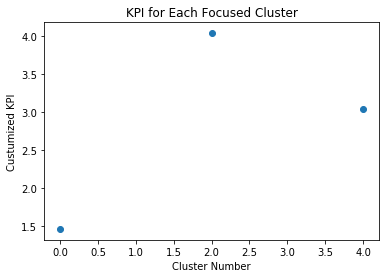

<Figure size 432x288 with 0 Axes>

In [42]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt


plt.scatter(dt_cluster_custom_kpi.index, dt_cluster_custom_kpi.KPI) #, markersize=15, markerfacecolor='yellow', markeredgecolor='gray', markeredgewidth=2)
plt.title('KPI for Each Focused Cluster')
plt.xlabel("Cluster Number")
plt.ylabel("Custumized KPI")
plt.show()

# saving a jpg figure
path="C:\Renovato\SweetVANProject\FirstAnalysys\scatterKPI.png"

plt.savefig(path,bbox_inches="tight")


#### The cluster with the highest KPI is number 2. Therefore it looks like it is cluster that comprises neighborhoods most similar to those we are looking for is cluster.

#### -- Now, let's create a indicator to rank the neighborhoods with a better fit. It will work the same way it did with the clusters.

In [43]:
# Dataframe with columns regarding desired venues for every neighborhood

axis= ['Cluster Labels','Neighborhood']
build_col=axis+custom_venues

dt_custom = dt_grouped_clone_labeled[build_col].copy()

# Number of cluster in which neighborhoods will be ranked.
topcluster=best_cluster

# Creating dataframe with data on cluster to be analysed
#dt_custom_top_cluster=dt_custom.loc[dt_custom['Cluster Labels'] == topcluster, dt_custom.columns[list(range(0, dt_custom.shape[1]))]]


dt_custom_top_cluster=dt_custom[(dt_custom['Cluster Labels'] == topcluster)].dropna()
dt_custom_top_cluster.reset_index(inplace = True)
dt_custom_top_cluster.drop(columns=['index'], inplace=True)

# Let's clone rows from FamProfile_trans_df to n lines to match the number of lines of dt_cluster_custom
NRows=dt_custom_top_cluster.shape[0]
CoefMaskClusters=pd.concat([FamProfile_trans_df]*NRows,axis=0)
CoefMaskClusters.reset_index(drop = True, inplace = True)


# Cloning...to create a new dataframe with the results!
dt_custom_top_cluster_kpi=dt_custom_top_cluster.copy()
dt_custom_top_cluster_kpi.reset_index(inplace = True)
dt_custom_top_cluster_kpi.drop(columns=['index'], inplace=True)


# Multiplying...
dt_custom_top_cluster_kpi.iloc[:,2:]=dt_custom_top_cluster.iloc[:,2:]*(CoefMaskClusters.iloc[:,:])

#Creating a column with the KPI ...
dt_custom_top_cluster_kpi['KPI'] = dt_custom_top_cluster_kpi.sum(axis=1)
dt_graph=dt_custom_top_cluster_kpi

# Since we want only those who have at least 1 of each venue let's remove those rows that have at least one category as zero!
dt_custom_top_cluster_kpi=dt_custom_top_cluster_kpi[(dt_custom_top_cluster_kpi != 0)].dropna()

# Let's save the neighborhhod cluster with the top KPI in a variable...
best_neighborhood=dt_custom_top_cluster_kpi.loc[dt_custom_top_cluster_kpi['KPI'].idxmax(), 'Neighborhood'] 




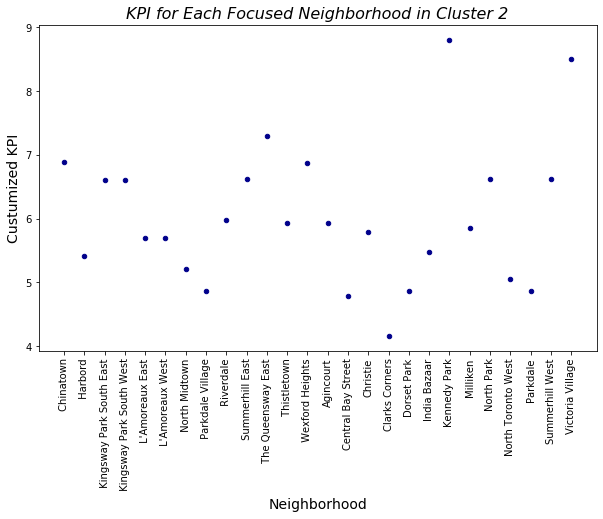

In [44]:
# Let's graph the KPI for each neighborhood...

dt_graph.plot(kind='scatter', x='Neighborhood', y='KPI', figsize=(10, 6), color='darkblue')

plt.title('KPI for Each Focused Neighborhood in Cluster ' + str(best_cluster), fontsize=16, fontstyle='oblique', color='black')
plt.xlabel("Neighborhood", fontsize=14)
plt.ylabel("Custumized KPI", fontsize=14)
plt.rc("xtick",labelsize=8)
plt.xticks(rotation=90)
plt.show()

#### Anyway, among those neighborhoods which have at least one venue in each customized category, these are the options..

In [45]:
dt_custom_top_cluster_kpi

,Cluster Labels,Neighborhood,Restaurants,Coffee Place,Park,Grocery Store,Gym,KPI
1,2,Harbord,2.471831,0.464789,0.140845,0.225352,0.112676,5.415493
6,2,North Midtown,2.535000,0.330000,0.100000,0.080000,0.160000,5.205000


#### It seems that based in our data we got only one result. For another dataset we could have a couple of them.

#### ---> Anyway, the top neighborhood is:

In [46]:
print(best_neighborhood)

 Harbord


#### Now, let's obtain the absolute number of venue in each customized categories and also visualize the data

In [47]:
dt_grouped_best = dt_onehot.groupby('Neighborhood').sum().reset_index()
dt_grouped_best=dt_grouped_best[(dt_grouped_best['Neighborhood'] == best_neighborhood)].dropna()
dt_grouped_best=dt_grouped_best[(dt_grouped_best != 0)].dropna(axis=1)


outa=[]   
keyout='estaurant'
for col in dt_grouped_best.columns:
    x=keyout in col
    if x is True:
        outa.append(col)
    #else:
        # do something if I need

# Creating the column 'Restaurants' with the sum of every restaurant data

dt_grouped_best['Restaurants'] = dt_grouped_best[outa].sum(axis=1)

# Now, let's get rid off the columns that contain data on restaurants
dt_grouped_best.drop(columns= outa, inplace=True)

# Now dealing with Coffee Places..

outb=[]
keyout='Coffee'
for col in dt_grouped_best.columns:
    x=keyout in col
    if x is True:
        outb.append(col)
    #else:
        # do something if I need

# Creating the column 'Coffee Place' with the sum of every coffee place data

dt_grouped_best['Coffee Place'] = dt_grouped_best[outb].sum(axis=1)
dt_grouped_best.drop(columns= outb, inplace=True)

# Now gyms...

outc=[]
keyout='Gym'
for col in dt_grouped_best.columns:
    x=keyout in col
    if x is True:
        outc.append(col)
    #else:
        # do something if I need

# Creating the column 'Gyms' with the sum of gym/fitness place data

dt_grouped_best['Gyms'] = dt_grouped_best[outc].sum(axis=1)
dt_grouped_best.drop(columns= outc, inplace=True)
dt_grouped_best.rename(columns={"Gyms": "Gym"}, inplace=True)

dt_grouped_best = dt_grouped_best[custom_venues]




#dt_grouped_best

dt_grouped_best_t=dt_grouped_best.transpose()
dt_grouped_best_t.rename(columns={dt_grouped_best['Restaurants'].idxmax(): "# Venues"}, inplace=True)

#t_grouped_best_t

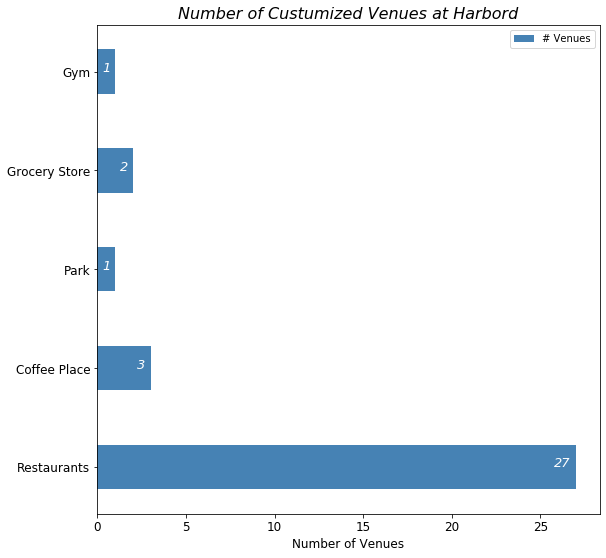

In [48]:
# Let's visualize it in a bar graph...

dt_grouped_best_t.plot(kind='barh', figsize=(9, 9), color='steelblue',width=0.45, fontsize=12)
plt.xlabel('Number of Venues', fontsize=12)
plt.title('Number of Custumized Venues at' + str(best_neighborhood), fontsize=16,fontstyle='oblique')


for index,value in enumerate(dt_grouped_best_t['# Venues']):
    label=value
    if index==0:
        plt.annotate(label, xy=(label-1.25, index), color='white', fontstyle='oblique',fontsize=13)
    else:
        plt.annotate(label, xy=(label-0.75, index), color='white',fontstyle='oblique',fontsize=13)
plt.show()


#### Let's get back to geo evaluation

In [49]:
neigh_list = dt_custom_top_cluster_kpi['Neighborhood'].tolist()
df_data_seg=df_data[df_data['Neighborhood'].isin(neigh_list)]
df_data_seg.drop_duplicates(subset ="Neighborhood", inplace = True)
df_data_seg

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,PostalCode,Borough,Neighborhood,Latitude,Longitude
135,M5R,Central Toronto,North Midtown,43.672710,-79.405678
147,M5S,Downtown Toronto,Harbord,43.662696,-79.400049


#### Finally, let's pin point the neighborhood in the map of Toronto.

In [50]:
#let's pin point it in Toronto's map.

address = 'Toronto, ON'

geolocator = Nominatim(user_agent="ca_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude


# With that info let's create a map with the neighborhoods

my_map_toronto = folium.Map(location=[latitude, longitude], zoom_start=15)

# add markers to map
for lat, lng, borough, neighborhood in zip(df_data_seg['Latitude'], df_data_seg['Longitude'], df_data_seg['Borough'], df_data_seg['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(my_map_toronto)  
    
my_map_toronto


#### Finally, what about checking out what else the neighborhood has to offer?

In [52]:
df_ref=dt_grouped_clone_labeled[dt_grouped_clone_labeled['Neighborhood']==best_neighborhood]

num_top_venues = 30

for hood in df_ref['Neighborhood']:
        print("----"+hood+"----")
        temp = df_ref[df_ref['Neighborhood'] == hood].T.reset_index()
        temp.columns = ['venue','freq']
        temp = temp.iloc[2:]
        temp['freq'] = temp['freq'].astype(float)
        temp = temp.round({'freq': 2})
        print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
        print('\n')

---- Harbord----
                            venue  freq
0                     Restaurants  0.38
1                    Coffee Place  0.08
2                     Karaoke Bar  0.03
3                    Dessert Shop  0.03
4                  Sandwich Place  0.03
5                   Grocery Store  0.03
6                     Pizza Place  0.03
7                             Bar  0.03
8                  Ice Cream Shop  0.03
9                  Cosmetics Shop  0.01
10                  Deli / Bodega  0.01
11                     Donut Shop  0.01
12            Fried Chicken Joint  0.01
13                      Gift Shop  0.01
14                            Gym  0.01
15              Health Food Store  0.01
16                      Nightclub  0.01
17                 Lingerie Store  0.01
18                Bubble Tea Shop  0.01
19  Paper / Office Supplies Store  0.01
20                           Park  0.01
21                            Pub  0.01
22                    Record Shop  0.01
23             Rock Cli

#### So, beyond the customized venues, the neighborhood has offers shops, spas, Theaters, bakeries and and a Rock Climbing Place !!!

## Further Analysis

#### Let's check the other clusters to see if we could get more interesting results ignoring the cluster analysis. I would like to try with clusters that had good KPI results and comprised every venue category assigned in the customized profile: 0 and 4!

#### --> Let's start with cluster 0

In [53]:
# Dataframe with columns regarding desired venues for every neighborhood

axis= ['Cluster Labels','Neighborhood']
build_col=axis+custom_venues

dt_custom = dt_grouped_clone_labeled[build_col].copy()

# Number of cluster in which neighborhoods will be ranked.
topcluster=0

# Creating dataframe with data on cluster to be analysed
#dt_custom_top_cluster=dt_custom.loc[dt_custom['Cluster Labels'] == topcluster, dt_custom.columns[list(range(0, dt_custom.shape[1]))]]


dt_custom_top_cluster=dt_custom[(dt_custom['Cluster Labels'] == topcluster)].dropna()
dt_custom_top_cluster.reset_index(inplace = True)
dt_custom_top_cluster.drop(columns=['index'], inplace=True)

# Let's clone rows from FamProfile_trans_df to n lines to match the number of lines of dt_cluster_custom
NRows=dt_custom_top_cluster.shape[0]
CoefMaskClusters=pd.concat([FamProfile_trans_df]*NRows,axis=0)
CoefMaskClusters.reset_index(drop = True, inplace = True)


# Cloning...to create a new dataframe with the results!
dt_custom_top_cluster_kpi=dt_custom_top_cluster.copy()
dt_custom_top_cluster_kpi.reset_index(inplace = True)
dt_custom_top_cluster_kpi.drop(columns=['index'], inplace=True)


# Multiplying...
dt_custom_top_cluster_kpi.iloc[:,2:]=dt_custom_top_cluster.iloc[:,2:]*(CoefMaskClusters.iloc[:,:])

#Creating a column with the KPI ...
dt_custom_top_cluster_kpi['KPI'] = dt_custom_top_cluster_kpi.sum(axis=1)
dt_graph=dt_custom_top_cluster_kpi

# Since we want only those who have at least 1 of each venue let's remove those rows that have at least one category as zero!
dt_custom_top_cluster_kpi=dt_custom_top_cluster_kpi[(dt_custom_top_cluster_kpi != 0)].dropna()

# Let's save the neighborhhod cluster with the top KPI in a variable...
try:
    best_neighborhood=dt_custom_top_cluster_kpi.loc[dt_custom_top_cluster_kpi['KPI'].idxmax(), 'Neighborhood'] 

except:

    print('Matrix is empty or no Neighborhood with signal = 1')


Matrix is empty or no Neighborhood with signal = 1


#### It seems no neighborhood in cluster 0 f the profile constraint that states that we should have at least one of each venue category!

#### ---> Now cluster 4!

In [54]:
# Dataframe with columns regarding desired venues for every neighborhood

axis= ['Cluster Labels','Neighborhood']
build_col=axis+custom_venues

dt_custom = dt_grouped_clone_labeled[build_col].copy()

# Number of cluster in which neighborhoods will be ranked.
topcluster=4

# Creating dataframe with data on cluster to be analysed
#dt_custom_top_cluster=dt_custom.loc[dt_custom['Cluster Labels'] == topcluster, dt_custom.columns[list(range(0, dt_custom.shape[1]))]]


dt_custom_top_cluster=dt_custom[(dt_custom['Cluster Labels'] == topcluster)].dropna()
dt_custom_top_cluster.reset_index(inplace = True)
dt_custom_top_cluster.drop(columns=['index'], inplace=True)

# Let's clone rows from FamProfile_trans_df to n lines to match the number of lines of dt_cluster_custom
NRows=dt_custom_top_cluster.shape[0]
CoefMaskClusters=pd.concat([FamProfile_trans_df]*NRows,axis=0)
CoefMaskClusters.reset_index(drop = True, inplace = True)


# Cloning...to create a new dataframe with the results!
dt_custom_top_cluster_kpi=dt_custom_top_cluster.copy()
dt_custom_top_cluster_kpi.reset_index(inplace = True)
dt_custom_top_cluster_kpi.drop(columns=['index'], inplace=True)


# Multiplying...
dt_custom_top_cluster_kpi.iloc[:,2:]=dt_custom_top_cluster.iloc[:,2:]*(CoefMaskClusters.iloc[:,:])

#Creating a column with the KPI ...
dt_custom_top_cluster_kpi['KPI'] = dt_custom_top_cluster_kpi.sum(axis=1)
dt_graph=dt_custom_top_cluster_kpi

# Since we want only those who have at least 1 of each venue let's remove those rows that have at least one category as zero!
dt_custom_top_cluster_kpi=dt_custom_top_cluster_kpi[(dt_custom_top_cluster_kpi != 0)].dropna()

# Let's save the neighborhhod cluster with the top KPI in a variable...
try:
    best_neighborhood=dt_custom_top_cluster_kpi.loc[dt_custom_top_cluster_kpi['KPI'].idxmax(), 'Neighborhood'] 
   
except:

    print('Matrix is empty or no Neighborhood with signal = 1')



dt_custom_top_cluster_kpi

   
    
    


,Cluster Labels,Neighborhood,Restaurants,Coffee Place,Park,Grocery Store,Gym,KPI
1,4,Bathurst Quay,1.083333,1.604167,0.833333,0.333333,0.333333,8.187500
10,4,Harbourfront,1.235000,1.100000,0.200000,0.080000,0.160000,6.775000
11,4,Harbourfront West,1.235000,1.100000,0.200000,0.080000,0.160000,6.775000
15,4,King and Spadina,1.978261,0.398551,0.289855,0.115942,0.231884,7.014493
23,4,Princess Gardens,1.000000,0.705128,0.256410,0.205128,0.410256,6.576923
36,4,The Junction South,1.596491,0.675439,0.175439,0.280702,0.280702,7.008772
41,4,Willowdale East,1.911765,0.862745,0.196078,0.470588,0.156863,7.598039
42,4,Willowdale West,1.911765,0.862745,0.196078,0.470588,0.156863,7.598039
44,4,Yorkville,1.820000,0.385000,0.100000,0.160000,0.240000,6.705000
45,4,Berczy Park,1.560000,0.770000,0.100000,0.080000,0.240000,6.750000


#### ----> Let's add them to the map.

In [55]:
#Let's scatter those guys in a map...

neigh_list = dt_custom_top_cluster_kpi['Neighborhood'].tolist()
df_data_seg=df_data[df_data['Neighborhood'].isin(neigh_list)]
df_data_seg.drop_duplicates(subset ="Neighborhood", inplace = True)



address = 'Toronto, ON'

geolocator = Nominatim(user_agent="ca_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude


# With that info let's create a map with the neighborhoods

my_map_toronto = folium.Map(location=[latitude, longitude], zoom_start=15)

# add markers to map
for lat, lng, borough, neighborhood in zip(df_data_seg['Latitude'], df_data_seg['Longitude'], df_data_seg['Borough'], df_data_seg['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(my_map_toronto)  
    
my_map_toronto


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


 It looks like a the initial cluster analysis allows us to come up with a focused number of choices for a customized neighborhood. When the pool of options is to broad further preferences must be set in the personal profile in order to help us narrow our final choices. 
 Such additional preferences could be, for example, budget restrains or specific preferred region due to geographical reason (i.e., someone who would rather live close to the office or a customized office location).
 Real estate prices data broken down by each neighborhood were not available, so it wasn't possible to add a budget restraint to the analysis. Nevertheless, such component is very important and should be definitely considered within the development of such a tool in the future. 